# Computer Vision Project: Unpaired Image-to-Image Translation with CycleGAN
**Authors: Kerr Tan, William Cheng, Zitong Luo**

## Install

In [12]:
# clone github repo
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


In [1]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [14]:
"""
%%capture
!pip install -r requirements.txt
"""

'\n%%capture\n!pip install -r requirements.txt\n'

## Datasets

**monet2photo**

In [15]:
"""
%%capture
%%bash
FILE=monet2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=monet2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**ukiyoe2photo**

In [16]:
"""
%%capture
%%bash
FILE=ukiyoe2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=ukiyoe2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**vangogh2photo**

In [17]:
"""
%%capture
%%bash
FILE=vangogh2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=vangogh2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**Datasets Showcase**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image

def load_train_images_from_datasets(base_path, styles):
    images = {}
    for col, style in enumerate(styles):
        trainA_dir = os.path.join(base_path, f"{style}/trainA")
        if os.path.exists(trainA_dir):
            trainA_files = [f for f in os.listdir(trainA_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
            if trainA_files:
                random_file = random.choice(trainA_files)
                img = np.array(Image.open(os.path.join(trainA_dir, random_file)))
                images[(0, col)] = img
        
        trainB_dir = os.path.join(base_path, f"{style}/trainB")
        if os.path.exists(trainB_dir):
            trainB_files = [f for f in os.listdir(trainB_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
            if trainB_files:
                random_file = random.choice(trainB_files)
                img = np.array(Image.open(os.path.join(trainB_dir, random_file)))
                images[(1, col)] = img
    return images

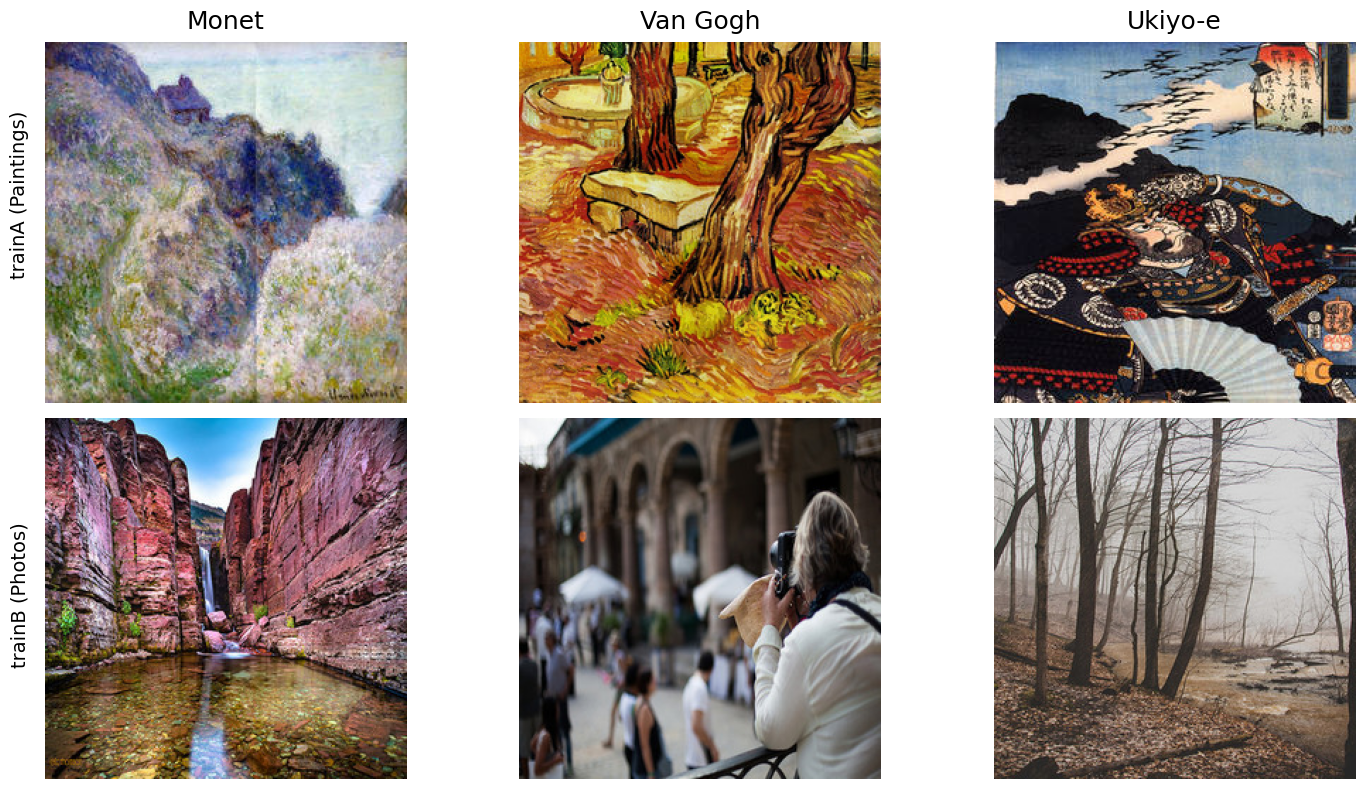

In [3]:
# define datasets styles for showcase
styles = ["monet2photo", "vangogh2photo", "ukiyoe2photo"]
style_names = ["Monet", "Van Gogh", "Ukiyo-e"]
row_labels = ["trainA (Paintings)", "trainB (Photos)"]
path = "./datasets"

images = load_train_images_from_datasets(path, styles)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for col, style in enumerate(style_names):
    axes[0, col].set_title(style, fontsize=18, pad=10)
for ax in axes.flatten():
    ax.axis('off')
for (row, col), img in images.items():
    axes[row, col].imshow(img)
fig.text(0.04, 0.75, 'trainA (Paintings)', va='center', rotation='vertical', fontsize=14)
fig.text(0.04, 0.25, 'trainB (Photos)', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()

## Pre-Trained Model

### Model Download

**monet2photo**

In [20]:
'''
%%capture
!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_monet
'''

'\n%%capture\n!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_monet\n'

**vangogh2photo**

In [21]:
'''
%%capture
!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_vangogh
'''

'\n%%capture\n!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_vangogh\n'

**ukiyoe2photo**

In [22]:
'''
%%capture
!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_ukiyoe
'''

'\n%%capture\n!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_ukiyoe\n'

### Model loading 

In [1]:
import torch 
style_monet_model = torch.load('checkpoints/style_monet_pretrained/latest_net_G.pth')
style_vangogh_model = torch.load('checkpoints/style_vangogh_pretrained/latest_net_G.pth')
style_ukiyoe_model = torch.load('checkpoints/style_ukiyoe_pretrained/latest_net_G.pth')

### Model Prediction

**photo2monet fake**

In [ ]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB --name style_monet_pretrained --model test --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

**photo2vangogh fake**

In [ ]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB --name style_vangogh_pretrained --model test --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

**photo2ukiyoe fake**

In [ ]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB --name style_ukiyoe_pretrained --model test --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

**Model Prediction showcase**

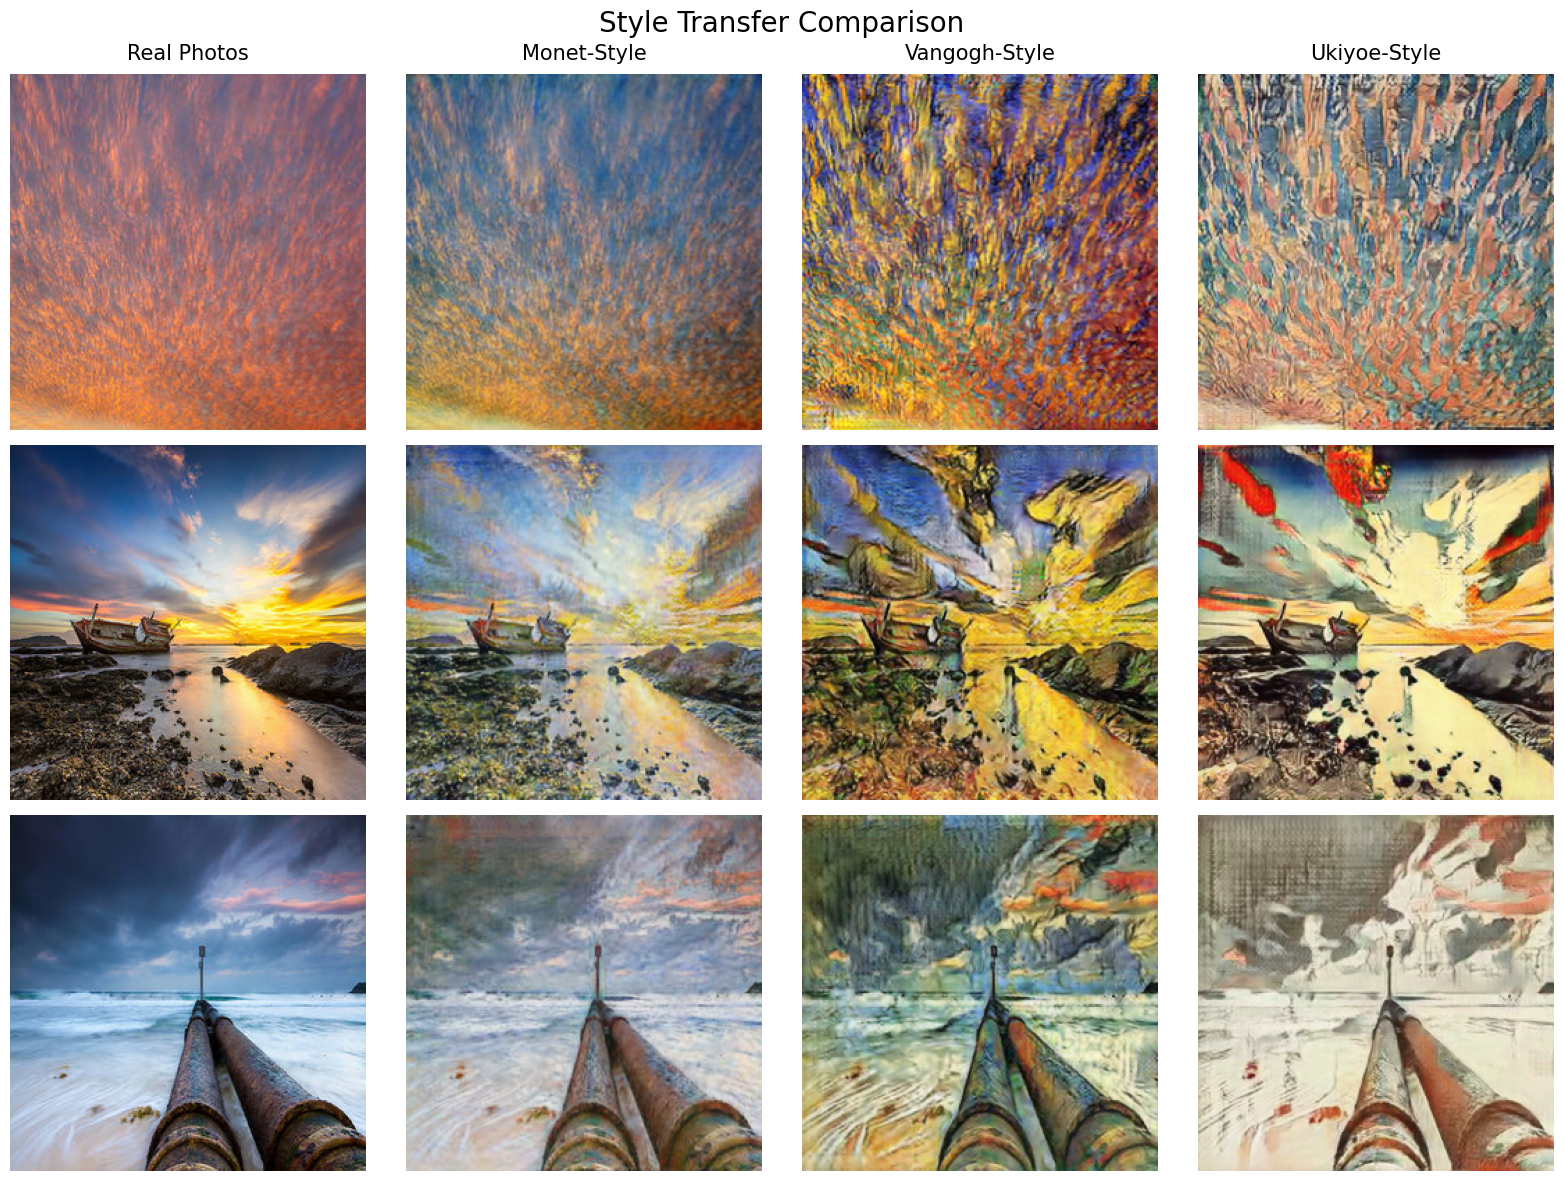

In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define your styles and base folder
result_styles = ['style_monet_pretrained', 'style_vangogh_pretrained', 'style_ukiyoe_pretrained']
base_path = 'results/{}/test_latest/images'

# Get the list of real image filenames from one of the style folders
real_images_dir = base_path.format(result_styles[0])
all_files = os.listdir(real_images_dir)
real_filenames = sorted([f for f in all_files if f.endswith('_real.png')])

# Randomly select 3 unique real image filenames
selected_real_filenames = random.sample(real_filenames, 3)

# display
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
column_titles = ['Real Photos', 'Monet-Style', 'Vangogh-Style', 'Ukiyoe-Style']

for row_idx, real_filename in enumerate(selected_real_filenames):
    base_name = real_filename.replace('_real.png', '')

    # Real image
    real_img_path = os.path.join(real_images_dir, real_filename)
    img = Image.open(real_img_path)
    axs[row_idx, 0].imshow(img)
    axs[row_idx, 0].axis('off')
    if row_idx == 0:
        axs[row_idx, 0].set_title(column_titles[0], fontsize=15, pad=10)

    # Fake images from each style
    for col_idx, style in enumerate(result_styles):
        style_dir = base_path.format(style)
        fake_filename = f"{base_name}_fake.png"
        fake_img_path = os.path.join(style_dir, fake_filename)
        img = Image.open(fake_img_path)
        axs[row_idx, col_idx + 1].imshow(img)
        axs[row_idx, col_idx + 1].axis('off')
        if row_idx == 0:
            axs[row_idx, col_idx + 1].set_title(column_titles[col_idx + 1],fontsize=15, pad=10)

plt.suptitle("Style Transfer Comparison", fontsize=20)
plt.tight_layout()
plt.show()

## Experiment

**Prepare Customized Dataset**

In [5]:
# Confirm number of images for training in each model
import os
print("Number of training images in Monet2Photo:", len(os.listdir('datasets/monet2photo/trainA')))
print("Number of testing images in Monet2Photo:", len(os.listdir('datasets/monet2photo/testA')))
print("Number of training images in Ukiyoe2Photo:", len(os.listdir('datasets/ukiyoe2photo/trainA')))
print("Number of testing images in Ukiyoe2Photo:", len(os.listdir('datasets/ukiyoe2photo/testA')))
print("Number of training images in VanGogh2Photo:", len(os.listdir('datasets/vangogh2photo/trainA')))
print("Number of testing images in VanGogh2Photo:", len(os.listdir('datasets/vangogh2photo/testA')))

imagesize = {"monet_train/test": (1072,121), "vangogh_train/test": (400, 400), "ukiyoe_train/test": (562, 263)}

Number of training images in Monet2Photo: 1072
Number of testing images in Monet2Photo: 121
Number of training images in Ukiyoe2Photo: 562
Number of testing images in Ukiyoe2Photo: 263
Number of training images in VanGogh2Photo: 400
Number of testing images in VanGogh2Photo: 400


**Copy Artist Photos to Customized Datasets**

In [ ]:
import shutil
def copy_images(base_dir, styles, new_styles):
    """
    Copies images from the source directories to the destination directories.
    Args:
        base_dir (str): The base directory where the styles are located.           
        styles (list): List of original style names.
        new_styles (list): List of new style names to copy images to.
    """
    for style, new_style in zip(styles, new_styles):
        for data_type in ['trainA', 'testA']:  # Loop through 'trainA' and 'testA'
            source_dir = os.path.join(base_dir, style, data_type)
            destination_dir = os.path.join(base_dir, new_style, data_type)

            # Create the destination directory if it doesn't exist
            if not os.path.exists(destination_dir):
                os.makedirs(destination_dir)

            # Loop through the files in the source directory and copy them to the destination
            for filename in os.listdir(source_dir):
                source_path = os.path.join(source_dir, filename)
                destination_path = os.path.join(destination_dir, filename)

                # Copy only the files (not directories)
                if os.path.isfile(source_path):
                    shutil.copy(source_path, destination_path)

            print(f"Images copied from {source_dir} to {destination_dir}")

# Define the base directory, styles, and new styles
base_dir = 'pytorch-CycleGAN-and-pix2pix/datasets'
styles = ["monet2photo", "vangogh2photo", "ukiyoe2photo"]
new_styles = ["monet2face", "vangogh2face", "ukiyoe2face"]

# Call the function to copy images
copy_images(base_dir, styles, new_styles)

Images copied from pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/trainA to pytorch-CycleGAN-and-pix2pix/datasets/monet2face/trainA
Images copied from pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testA to pytorch-CycleGAN-and-pix2pix/datasets/monet2face/testA
Images copied from pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/trainA to pytorch-CycleGAN-and-pix2pix/datasets/vangogh2face/trainA
Images copied from pytorch-CycleGAN-and-pix2pix/datasets/vangogh2photo/testA to pytorch-CycleGAN-and-pix2pix/datasets/vangogh2face/testA
Images copied from pytorch-CycleGAN-and-pix2pix/datasets/ukiyoe2photo/trainA to pytorch-CycleGAN-and-pix2pix/datasets/ukiyoe2face/trainA
Images copied from pytorch-CycleGAN-and-pix2pix/datasets/ukiyoe2photo/testA to pytorch-CycleGAN-and-pix2pix/datasets/ukiyoe2face/testA


**Loading Photos From Kaggle**

In [ ]:
# checking the size of the orginal images
from PIL import Image

# An example image path
image_path = 'pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testA/00020.jpg'
with Image.open(image_path) as img:
    width, height = img.size
    print(f"The image dimensions are {width}x{height} pixels.")


The image dimensions are 256x256 pixels.


In [2]:
# face images loading and seperate into training and testing sets
from PIL import Image
import os

# Input and output directories
face_input_dir = 'datasets/archive'
face_output_dir_train = 'datasets/face_images/train'
face_output_dir_test = 'datasets/face_images/test'

# Create the train and test directories 
os.makedirs(face_output_dir_train, exist_ok=True)
os.makedirs(face_output_dir_test, exist_ok=True)

# Get the list of all images in the input directory
face_images = os.listdir(face_input_dir)

# Split the images: first 2000 for training, last 1000 for testing
train_images = face_images[:2000]
test_images = face_images[2000:3000]

# Function to preprocess and save images
def preprocess_and_save_images(image_files, input_dir, output_dir):
    for image_file in image_files:
        image_path = os.path.join(input_dir, image_file)
        
        try:
            with Image.open(image_path) as img:
                # Optionally resize the image to 256x256
                resized_img = img.resize((256, 256))
                
                # Define the output path and ensure it's saved as JPG
                output_path = os.path.join(output_dir, f"{os.path.splitext(image_file)[0]}.jpg")
                
                # Save the resized image in the new folder as JPG
                resized_img.save(output_path, format='JPEG')

        except Exception as e:
            print(f"Error processing {image_file}: {e}")

# Process and save the train and test images
preprocess_and_save_images(train_images, face_input_dir, face_output_dir_train)
preprocess_and_save_images(test_images, face_input_dir, face_output_dir_test)

print(f"Successfully processed and saved {len(train_images)} training images to {face_output_dir_train}")
print(f"Successfully processed and saved {len(test_images)} testing images to {face_output_dir_test}")
print(f"Number of training images in Training Set: {len(os.listdir('datasets/face_images/train'))}" )
print(f"Number of testing images in Testing Set: {len(os.listdir('datasets/face_images/test'))}")

Error processing seed111380.png: unrecognized data stream contents when reading image file
Error processing seed111695.png: broken data stream when reading image file
Error processing seed111370.png: unrecognized data stream contents when reading image file
Successfully processed and saved 2000 training images to datasets/face_images/train
Successfully processed and saved 1000 testing images to datasets/face_images/test
Number of training images in Training Set: 1998
Number of testing images in Testing Set: 999


**Face Image Showcase**

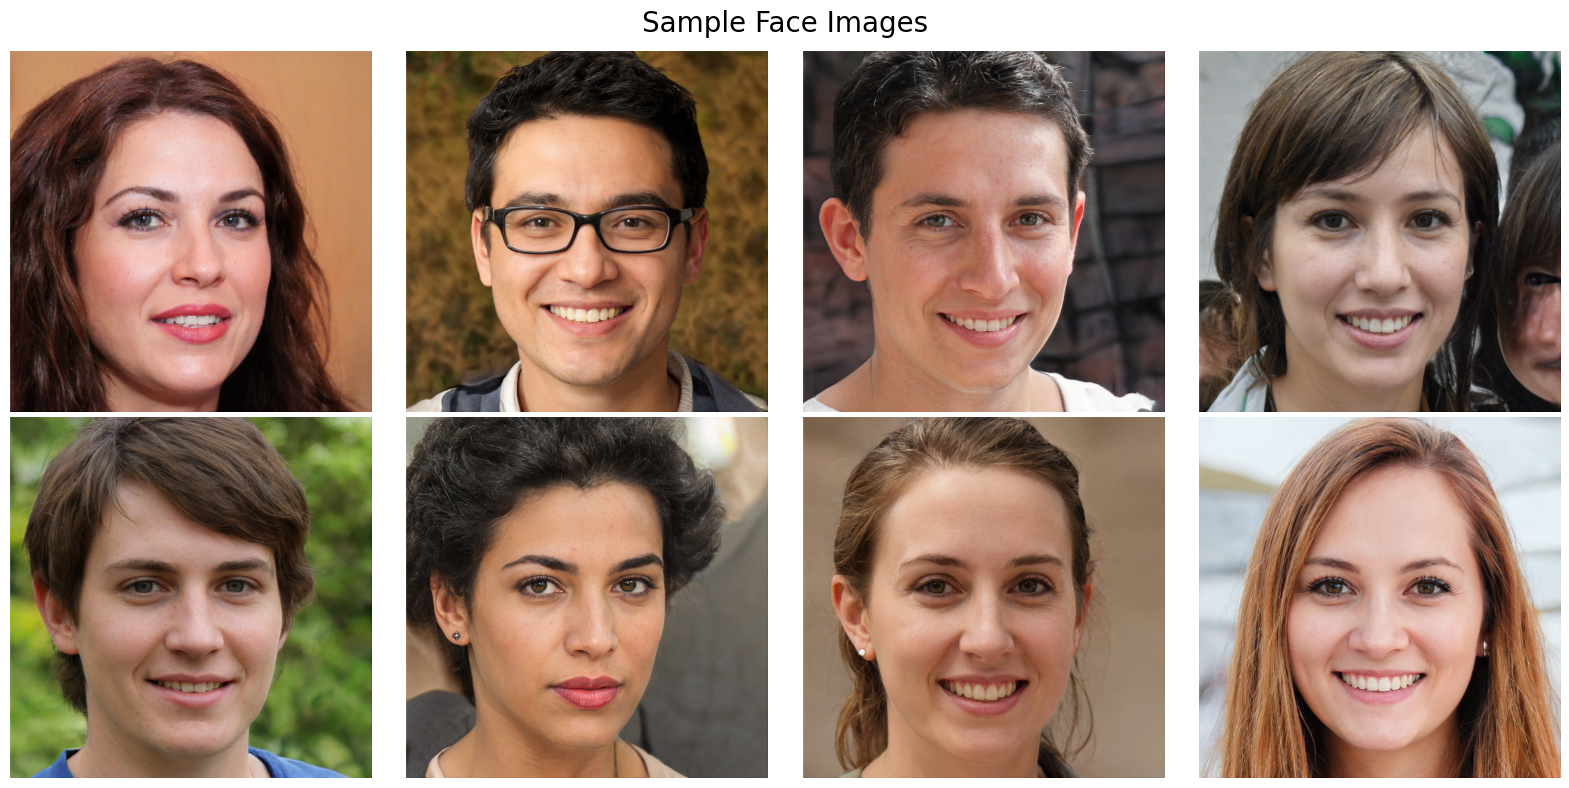

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import os

fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Create a 2x4 grid
axes = axes.flatten()  # Flatten the 2D array to 1D for easier indexing

for i in range(min(8, len(face_images))):
    img_path = os.path.join(face_input_dir, face_images[i])
    img = Image.open(img_path)
    
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis

fig.suptitle("Sample Face Images", fontsize=20)
plt.tight_layout()  # Improve layout for better spacing
plt.show()


**Suffle Train / Test Data into Customized Dataset Folder**

In [8]:
import os
import shutil
import random

def copy_images(face_image_dir, new_styles, base_dir, imagesize):
    """
    Copies shuffled images from the face_image directory into new style directories' trainB and testB sets.
    Args:
        face_image_dir (str): The directory where the face images are located (train and test sets).
        new_styles (list): List of new style names to copy images to.
        base_dir (str): The base directory for the new style folders.
        imagesize (dict): Dictionary containing the number of images for each new style's train/test set.
    """
    for new_style in new_styles:
        for data_type in ['train', 'test']:  
            source_dir = os.path.join(face_image_dir, data_type)
            destination_dir = os.path.join(base_dir, new_style, f'{data_type}B')  # Target directories: trainB, testB

            if not os.path.exists(destination_dir):
                os.makedirs(destination_dir)
            all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
            
            random.shuffle(all_files)

            # Get the number of images from the imagesize dictionary for the corresponding style and data type
            size_key = f"{new_style.split('2')[0]}_{data_type}"  # E.g., 'monet_train', 'vangogh_test', etc.
            num_images_in_style = imagesize.get(size_key) 
            num_images_to_copy = min(num_images_in_style, len(all_files))

            for filename in all_files[:num_images_to_copy]:
                source_path = os.path.join(source_dir, filename)
                destination_path = os.path.join(destination_dir, filename)

                shutil.copy(source_path, destination_path)

            print(f"Copied {num_images_to_copy} images from {source_dir} to {destination_dir}")

# Define the face image directory, new styles, and the base directory for styles
face_image_dir = 'datasets/face_images'
new_styles = ["monet2face", "vangogh2face", "ukiyoe2face"]
base_dir = 'datasets'
imagesize = {
    "monet_train": 1072,
    "vangogh_train": 400,
    "ukiyoe_train": 562,
    "monet_test": 121,
    "vangogh_test": 400,
    "ukiyoe_test":263
}
copy_images(face_image_dir, new_styles, base_dir, imagesize)

Copied 1072 images from datasets/face_images/train to datasets/monet2face/trainB
Copied 121 images from datasets/face_images/test to datasets/monet2face/testB
Copied 400 images from datasets/face_images/train to datasets/vangogh2face/trainB
Copied 400 images from datasets/face_images/test to datasets/vangogh2face/testB
Copied 562 images from datasets/face_images/train to datasets/ukiyoe2face/trainB
Copied 263 images from datasets/face_images/test to datasets/ukiyoe2face/testB


**Train Monet2Face Model**

In [ ]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot datasets/datasets/monet2face --name monet2face --model cycle_gan --gpu_ids 0,1 --direction 'BtoA' 

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: datasets/datasets/monet2face  	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                       

**Train Vangogh2Face Model**

In [11]:
import torch
for i in range(torch.cuda.device_count()):
    print(f"Device {i}: {torch.cuda.get_device_name(i)}")

Device 0: NVIDIA A100-SXM4-40GB
Device 1: NVIDIA A100-SXM4-40GB
Device 2: NVIDIA A100-SXM4-40GB
Device 3: NVIDIA A100-SXM4-40GB


In [ ]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot datasets/datasets/vangogh2face --name vangogh2face --model cycle_gan --gpu_ids 0,1 --batch_size 8 --direction 'BtoA' --save_by_iter --save_epoch_freq 2 --display_id -1 --no_html

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: datasets/datasets/vangogh2face	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: lat

In [ ]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot datasets/datasets/vangogh2face --name vangogh2face --model cycle_gan --gpu_ids 0,1 --batch_size 8 --continue_train --epoch_count 53 --direction 'BtoA' --save_by_iter --save_epoch_freq 2 --display_id -1 --no_html

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: datasets/datasets/vangogh2face	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
             

In [ ]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot datasets/datasets/vangogh2face --name vangogh2face --model cycle_gan --gpu_ids 0,1 --batch_size 8 --continue_train --epoch_count 155 --direction 'BtoA' --save_by_iter --save_epoch_freq 2 --display_id -1 --no_html

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: datasets/datasets/vangogh2face	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
             

In [4]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot datasets/datasets/vangogh2face --name vangogh2face --model cycle_gan --gpu_ids 0,1,2,3 --batch_size 32 --continue_train --epoch_count 163 --direction 'BtoA' --save_by_iter --save_epoch_freq 2 --display_id -1 --no_html

----------------- Options ---------------
               batch_size: 32                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: datasets/datasets/vangogh2face	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
             

**Train Ukiyoe2Face Model**

In [10]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot datasets/datasets/ukiyoe2face --name ukiyoe2face --model cycle_gan --gpu_ids 0,1,2,3 --batch_size 64 --direction 'BtoA' --save_by_iter --save_epoch_freq 2 --display_id -1 --no_html

----------------- Options ---------------
               batch_size: 64                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: datasets/datasets/ukiyoe2face 	[default: None]
             dataset_mode: unaligned                     
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: lat